In [1]:
import pandas as pd 
df = pd.read_csv('emails.csv')
df.head()

,Spam,Message
0,0,Please call me at 8
1,1,Free money is available for you
2,0,I study he studies they are students I studied...
3,1,I am working at office now to 9 evening
4,0,U dun say so early hor... U c already then say...


In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download ('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ya313\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ya313\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
text = "hello: this is an email spam classification!"

tokens = word_tokenize(text)
tokens

['hello', ':', 'this', 'is', 'an', 'email', 'spam', 'classification', '!']

In [4]:
import string
tokens = [token for token in tokens if token not in string.punctuation]
tokens

['hello', 'this', 'is', 'an', 'email', 'spam', 'classification']

In [5]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [6]:
stop_words = stopwords.words('english')
tokens = [token for token in  tokens if token not in stop_words]
tokens

['hello', 'email', 'spam', 'classification']

In [7]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
print(len(stop_words))

179


In [9]:
stemmer = PorterStemmer()
tokens = [stemmer.stem(token) for token in tokens]
tokens

['hello', 'email', 'spam', 'classif']

In [10]:
import re

def preprocess_text(text):
    
    tokens = word_tokenize(text.lower())
    
    tokens = [token for token in tokens if token not in string.punctuation]
    
    stop_words = stopwords.words('english')
    tokens = [token for token in tokens if token not in stop_words]
    
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    
    preprocessed_text = ' '.join(tokens)

    preprocessed_text = re.sub(r'http\S+|www\S+', '', preprocessed_text)

    preprocessed_text = re.sub(r'\d+', '', preprocessed_text)
    return preprocessed_text

In [11]:
email = "Hello! These are 5678 examples of emails for spam classification. "

preprocessed_email = preprocess_text(email)
print(preprocessed_email)

hello  exampl email spam classif


In [12]:
df['processed_Message'] = df['Message'].apply(preprocess_text)

df

,Spam,Message,processed_Message
0,0,Please call me at 8,pleas call
1,1,Free money is available for you,free money avail
2,0,I study he studies they are students I studied...,studi studi student studi yesterday
3,1,I am working at office now to 9 evening,work offic even
4,0,U dun say so early hor... U c already then say...,u dun say earli hor ... u c alreadi say ...
...,...,...,...
5222,0,"It‘s reassuring, in this crazy world.",‘ reassur crazi world
5223,0,Oh... Okie lor...We go on sat...,oh ... oki lor ... go sat ...
5224,1,You are awarded a SiPix Digital Camera! call 0...,award sipix digit camera call landlin deliver...
5225,0,"Hey chief, can you give me a bell when you get...",hey chief give bell get need talk royal visit ...


In [13]:
df_spam = df[df['Spam']==1]

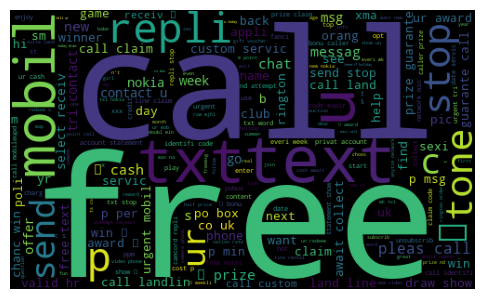

In [14]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud

spam_words_list = df_spam['processed_Message'].astype(str)

spam_words_str = ' '.join(spam_words_list)

spam_wordcloud = WordCloud(width=500, height=300).generate(spam_words_str)

plt.figure(figsize=(6, 4))

plt.imshow(spam_wordcloud)

plt.axis("off")

plt.show()

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

documents = [
    "My cat and dog sat on the mat",
    "strange cat jumped over the mat",
    "His cat ate the mouse ran across the mat",
    "Her dog run after my cat and mouse",
]

max_features = 6

count_vectorizer = CountVectorizer(max_features=max_features)

vectors = count_vectorizer. fit_transform(documents)

print(vectors)

  (0, 4)	1
  (0, 0)	1
  (0, 1)	1
  (0, 5)	1
  (0, 2)	1
  (1, 0)	1
  (1, 5)	1
  (1, 2)	1
  (2, 0)	1
  (2, 5)	2
  (2, 2)	1
  (2, 3)	1
  (3, 4)	1
  (3, 0)	1
  (3, 1)	1
  (3, 3)	1


In [37]:
feature_names = count_vectorizer.get_feature_names_out()

print("Features Names: ")
print(feature_names)

Features Names: 
['cat' 'dog' 'mat' 'mouse' 'my' 'the']


In [39]:
print(vectors.toarray())

[[1 1 1 0 1 1]
 [1 0 1 0 0 1]
 [1 0 1 1 0 2]
 [1 1 0 1 1 0]]


In [41]:
example_df = pd.DataFrame(data=vectors.toarray(),columns=feature_names)

example_df

,cat,dog,mat,mouse,my,the
0,1,1,1,0,1,1
1,1,0,1,0,0,1
2,1,0,1,1,0,2
3,1,1,0,1,1,0


In [35]:
frequencies = vectors.toarray().sum(axis=0)

sorted_indices = frequencies.argsort()[::-1]
sorted_feature_names = [feature_names[idx] for idx in sorted_indices]
sorted_frequencies = frequencies[sorted_indices]

for i in range(len(sorted_feature_names)):
    print(sorted_feature_names[i], ": ", sorted_frequencies[i])

the :  4
cat :  4
mat :  3
my :  2
mouse :  2
dog :  2


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer 

tfidf_vectorizer = TfidfVectorizer(max_features=max_features)
tfidf_vectors = tfidf_vectorizer.fit_transform(documents)

print("\nTF-IDF Vectorization:")

feature_names=tfidf_vectorizer.get_feature_names_out()

example_df = pd.DataFrame(data=tfidf_vectors.toarray(),columns=feature_names)
example_df


TF-IDF Vectorization:


,cat,dog,mat,mouse,my,the
0,0.341846,0.516470,0.418127,0.000000,0.516470,0.418127
1,0.500491,0.000000,0.612172,0.000000,0.000000,0.612172
2,0.304813,0.000000,0.372830,0.460519,0.000000,0.745660
3,0.356966,0.539313,0.000000,0.539313,0.539313,0.000000


In [61]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

corpus = df['processed_Message']

max_features = 100

count_vectorizer = CountVectorizer(max_features=max_features)

vectors = count_vectorizer.fit_transform(corpus)

tfidf_vectorizer = TfidfVectorizer(max_features = max_features)
tfidf_vectors = tfidf_vectorizer.fit_transform(corpus)

In [63]:
from sklearn.model_selection import train_test_split

X = vectors

y = df["Spam"]

X = X.toarray()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [73]:
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10


C:\Users\ya313\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 738us/step - accuracy: 0.8526 - loss: 0.4768
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.9325 - loss: 0.1928
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - accuracy: 0.9614 - loss: 0.1181
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.9706 - loss: 0.0973
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - accuracy: 0.9691 - loss: 0.1020
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.9687 - loss: 0.0929
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.9733 - loss: 0.0825
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - accuracy: 0.9775 - loss: 0.0803
Epoch 9/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - accuracy: 0.9706 - loss: 0.0892
Epoch 10/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.9686 - loss: 0.0952


In [75]:
import numpy as np

y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', round(accuracy*100,2))

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 97.25


In [77]:
from sklearn.model_selection import train_test_split

X = tfidf_vectors

y = df["Spam"]

X = X.toarray()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [79]:
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10


C:\Users\ya313\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 734us/step - accuracy: 0.8538 - loss: 0.5013
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.9187 - loss: 0.2095
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.9515 - loss: 0.1425
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - accuracy: 0.9579 - loss: 0.1205
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.9613 - loss: 0.1162
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.9696 - loss: 0.0973
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.9701 - loss: 0.0976
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.9691 - loss: 0.1012
Epoch 9/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.9692 - loss: 0.0910
Epoch 10/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.9783 - loss: 0.0748


In [81]:
import numpy as np

y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', round(accuracy*100,2))

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 97.09


In [101]:
message='come and meet me at 9'

processed_message=preprocess_text(message)

vector = tfidf_vectorizer.transform([processed_message])
vector_dense = vector.toarray()

y_pred_prob = model.predict(vector_dense)

y_pred = np.round(y_pred_prob)
print("the prediction is :")
print(y_pred)
if y_pred == 0:
    print('this email is not spam')
else:
    print('this email is spam')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
the prediction is :
[[0.]]
this email is not spam
